# Import Libraries

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

# Load dataset

In [68]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Feature Engineering and Descriptions 

In [69]:
dataset['sep_pet_lenth'] = dataset['sepal-length']/dataset['petal-length']
dataset['sep_pet_with'] = dataset['sepal-width']/dataset['petal-width']

In [70]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width  sep_pet_lenth  \
count    150.000000   150.000000    150.000000   150.000000     150.000000   
mean       5.843333     3.054000      3.758667     1.198667       2.016495   
std        0.828066     0.433594      1.764420     0.763161       1.059604   
min        4.300000     2.000000      1.000000     0.100000       1.050000   
25%        5.100000     2.800000      1.600000     0.300000       1.230469   
50%        5.800000     3.000000      4.350000     1.300000       1.410603   
75%        6.400000     3.300000      5.100000     1.800000       3.176471   
max        7.900000     4.400000      6.900000     2.500000       4.833333   

       sep_pet_with  
count    150.000000  
mean       6.697701  
std        8.054875  
min        1.130435  
25%        1.602778  
50%        2.148352  
75%       11.583333  
max       41.000000  


# Box and Whisker plots

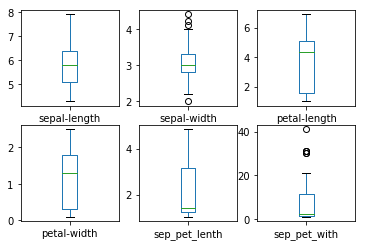

In [72]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize= (6,6))
plt.show()

# Histograms

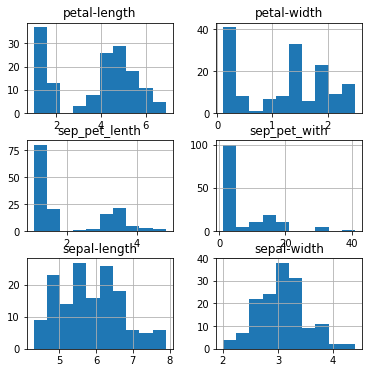

In [73]:
dataset.hist(figsize= (6,6))
plt.show()

# Scatter plot matrix

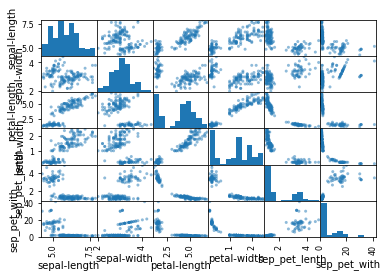

In [30]:
scatter_matrix(dataset)
plt.show()

## Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'sep_pet_lenth', 'sep_pet_with']] = scaler.fit_transform(dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'sep_pet_lenth', 'sep_pet_with']])

# Split-out validation dataset

In [86]:
import numpy as np
array = dataset.values
X = np.delete(array,4,1)
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [87]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class,sep_pet_lenth,sep_pet_with
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,1.540019,1.345581
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,1.404746,1.034170
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,1.514005,1.158735
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,0.994418,1.096452
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,1.472382,1.407863


# Create Model Shells (Instantiate them)

In [88]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Spot test each model with Cross-Validation

In [89]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.055902)
LDA: 0.983333 (0.033333)
KNN: 0.966667 (0.040825)
CART: 0.983333 (0.033333)
RF: 0.958333 (0.041667)
NB: 0.983333 (0.033333)
SVM: 0.975000 (0.038188)


# Graphical comparison of algorithms

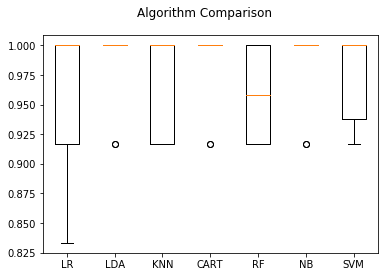

In [90]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
K-Nearest Neighbors:

In [91]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.73      0.84        11

    avg / total       0.92      0.90      0.90        30



SVM - Support Vector Machine:

In [92]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

    avg / total       0.90      0.90      0.90        30



Random Forest Classifier

In [93]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

    avg / total       0.90      0.90      0.90        30



In [94]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7666666666666667
[[7 0 0]
 [0 7 5]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.78      0.58      0.67        12
 Iris-virginica       0.64      0.82      0.72        11

    avg / total       0.78      0.77      0.76        30

